## 3DCoMPaT: 3D Dataloader Demo

We give here a few pointers as to how to easily manipulate the 3D point cloud data from the 3DCoMPaT dataset.

All **3D shapes** in our dataset are identified by a unique 36 characters string, which also identifies all views and metadata pertaining a specific shape.


### Table of Contents
1. [Loading raw mesh](##Visualize original mesh)
2. [Loading sampled point clouds](##Visualize sampled point clouds)
2. [Loading stylized CAD models](##Visualize stylized sampled point clouds)


In [8]:
import os
import os.path as osp
import glob
import pandas as pd
import h5py
import numpy as np
from torch.utils.data import Dataset
import torch
import pdb
import trimesh
import matplotlib.pyplot as plt
from compat3D import CompatLoader3D, CompatLoader_stylized3D


def show_pointcloud(pointclouds, classes, parts, colors, size=4):
    """
    Displaying point clouds in the notebook.
    """
    
    n_pcs = len(pointclouds)
    fig = plt.figure(figsize=(size*n_pcs, size))
    for i, (pc, cls, part, clr) in enumerate(zip(pointclouds, classes, parts, colors)):
        ax = fig.add_subplot(1, n_pcs, i+1, projection='3d')
        if np.sum(clr.numpy())==0:
            print('using part as colors')
            colors = part.numpy()
        else:
            colors = clr.numpy()[:,:4] / 255.0
#         print(pc.shape, colors.shape)
        ax.scatter(pc[:,1], pc[:,0], pc[:,2], s=2, c=colors, )
        title = 'object category: ' + str(cls.item()) + '\n parts:' + str(np.unique(part))
        ax.set_title(title)
    plt.show()


## Visualize original mesh
### n_point=0

In [17]:
# class CompatLoader_3D(CompatLoader3D):
#     """
#     UnStylized 3D dataset loaders.

#     Args:
#         meta_dir:    Metadata directory
#         root_dir:    Base dataset URL containing data split shards
#         split:       One of {train, valid}.
#         n_comp:      Number of compositions to use
#         n_points:    Number of sampled points. When n_points=0, returned original mesh.

train_dataset = CompatLoader3D(meta_dir='./metadata/', root_dir="./", split="train", n_point=0)
shape_id, mesh = train_dataset.__getitem__(0)
# mesh.show()

## Get sampled point clouds
### n_point=2048

In [10]:
train_dataset = CompatLoader3D(meta_dir='./metadata/', root_dir="./", split="train", n_point=2048)
shape_id, sample_xyz, cls, sample_colors, sample_segment = train_dataset.__getitem__(0)
print(shape_id, cls, sample_xyz.shape, sample_colors.shape, sample_segment.shape)
np.unique(sample_segment)

concatenating texture: may result in visual artifacts


6af5c6ba-4d2d-4b9a-91cd-bdee96e4a713 0 (2048, 3) (2048, 3) (2048,)


array([ 25,  62,  73, 157, 232, 234, 235], dtype=int32)

## Visualize sampled point clouds

concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts


using part as colors
using part as colors
using part as colors
using part as colors


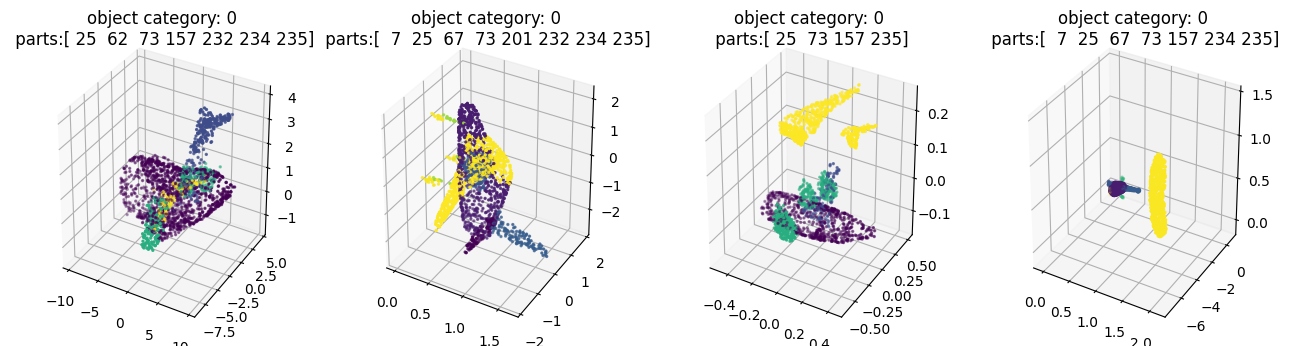

In [11]:
trainDataLoader = torch.utils.data.DataLoader(train_dataset, batch_size=4)
_, pointclouds, classes, colors, parts = next(iter(trainDataLoader))

show_pointcloud(pointclouds, classes, parts, colors)

## Visualize stylized sampled point clouds
### n_point=4096

concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts
concatenating texture: may result in visual artifacts


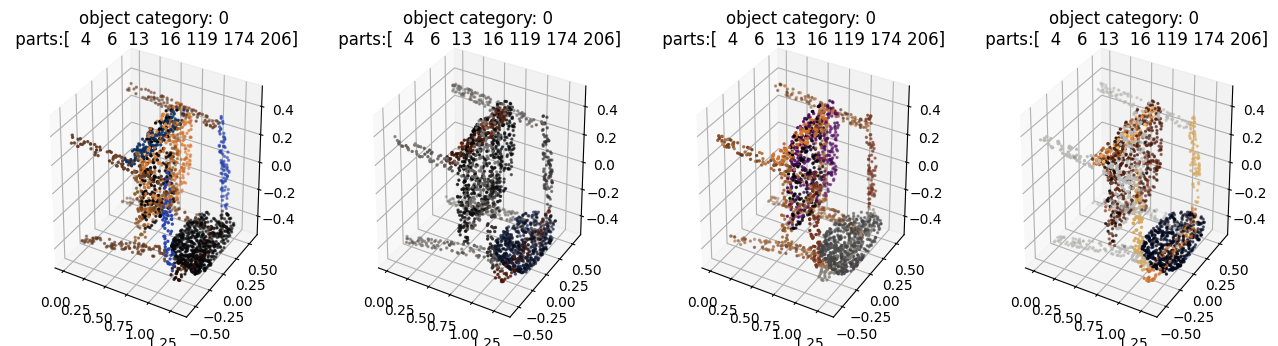

In [15]:
# class CompatLoader_stylized3D(CompatLoader3D):
#     """
#     Stylized 3D dataset loaders.

#     Args:
#         meta_dir:    Metadata directory
#         root_dir:    Base dataset URL containing data split shards
#         split:       One of {train, valid}.
#         n_comp:      Number of compositions to use
#         n_points:    Number of sampled points. When n_points=0, returned original mesh.

train_dataset = CompatLoader_stylized3D(meta_dir='./metadata/', root_dir="./", split="train", n_point=2048)

trainDataLoader = torch.utils.data.DataLoader(train_dataset, batch_size=4)
_, pointclouds, classes, colors, parts = next(iter(trainDataLoader))

show_pointcloud(pointclouds, classes, parts, colors)

In [13]:
mesh = trimesh.load('rendered_models/060dcf1e-f580-4b51-9769-4fba44152fcb/060dcf1e-f580-4b51-9769-4fba44152fcb_1684500.glb')

In [16]:
# mesh.show()